In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

2024-04-28 11:35:09.661004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
columns = ['datetime','choke','psig','apsig','oil','gas','water']
columns2 = ['choke','psig','apsig','oil','gas','water']
columns3 = ['psig','apsig','oil','gas','water']

In [3]:
df_raw = pd.read_csv('final.csv')

In [4]:
# df_sample = df_raw.iloc[:100]
df_sample = df_raw.copy()

In [5]:
# fill error data
df_sample = df_sample.ffill()

In [6]:
df_actual = df_sample.copy()

# Actual Data

In [7]:
df_actual.head()

,datetime,choke,psig,apsig,oil,gas,water
0,15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
1,15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
2,15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
3,15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
4,15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208


In [8]:
# data type
df_actual.dtypes

datetime     object
choke         int64
psig          int64
apsig         int64
oil         float64
gas         float64
water       float64
dtype: object

In [9]:
# convert data type
df_actual[['choke']] = df_actual[['choke']].astype(float)
# df_actual[columns2]

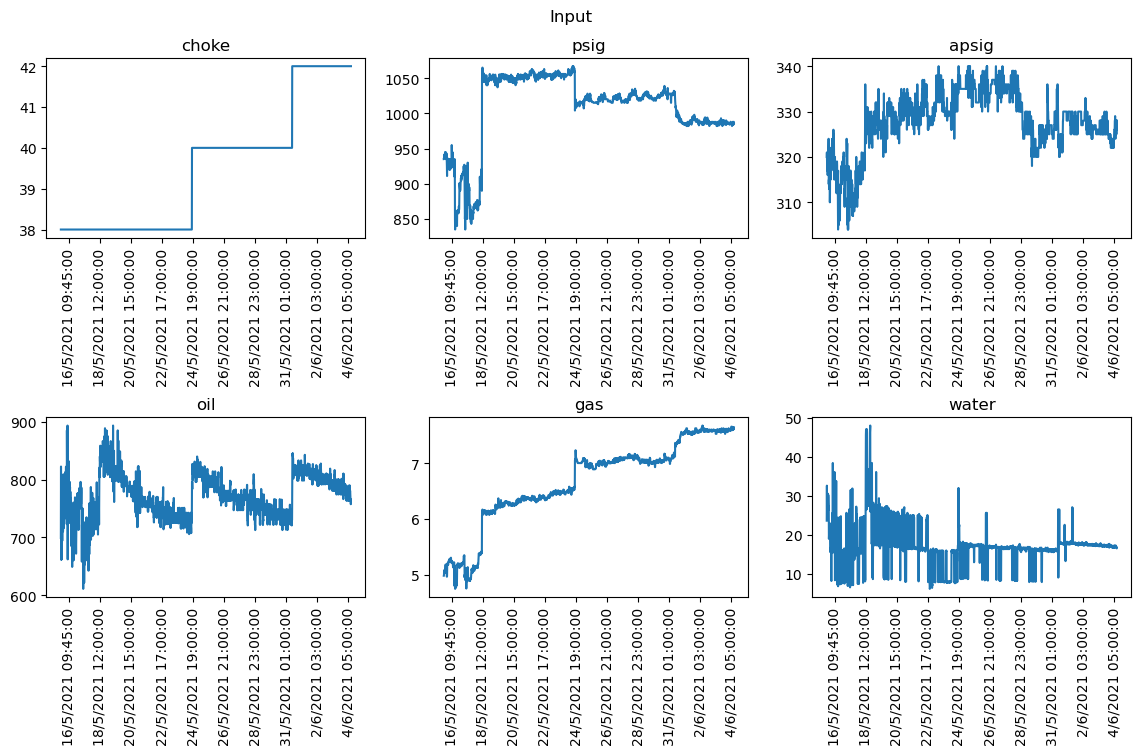

In [21]:
# plotting
fig, ax = plt.subplots(figsize=(14, 7), ncols=3, nrows=2)

ax[0][0].plot(df_actual['datetime'], df_actual['choke'])
ax[0][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][0].tick_params(axis='x', labelrotation=90)
ax[0][0].set_title('choke')

ax[0][1].plot(df_actual['datetime'], df_actual['psig'])
ax[0][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][1].tick_params(axis='x', labelrotation=90)
ax[0][1].set_title('psig')

ax[0][2].plot(df_actual['datetime'], df_actual['apsig'])
ax[0][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][2].tick_params(axis='x', labelrotation=90)
ax[0][2].set_title('apsig')

ax[1][0].plot(df_actual['datetime'], df_actual['oil'])
ax[1][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][0].tick_params(axis='x', labelrotation=90)
ax[1][0].set_title('oil')

ax[1][1].plot(df_actual['datetime'], df_actual['gas'])
ax[1][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][1].tick_params(axis='x', labelrotation=90)
ax[1][1].set_title('gas')

ax[1][2].plot(df_actual['datetime'], df_actual['water'])
ax[1][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][2].tick_params(axis='x', labelrotation=90)
ax[1][2].set_title('water')

fig.subplots_adjust(hspace=1)
fig.suptitle('Input', y=0.95)

plt.show()

In [11]:
df_sample = df_sample[columns2].astype(float)

In [12]:
df_sample[columns2].dtypes

choke    float64
psig     float64
apsig    float64
oil      float64
gas      float64
water    float64
dtype: object

In [13]:
# scaling normalization
min_params = df_sample[columns2].min()
max_params = df_sample[columns2].max()


df_normalized = df_sample.copy()
df_normalized[columns2] = (df_normalized[columns2] - min_params) / (max_params - min_params)

In [14]:
df_normalized.head()

,choke,psig,apsig,oil,gas,water
0,0.0,0.431034,0.444444,0.311858,0.080260,0.417431
1,0.0,0.431034,0.472222,0.748918,0.082992,0.631881
2,0.0,0.452586,0.388889,0.179187,0.110997,0.479358
3,0.0,0.443966,0.361111,0.449028,0.107923,0.551606
4,0.0,0.452586,0.416667,0.179187,0.113730,0.479358


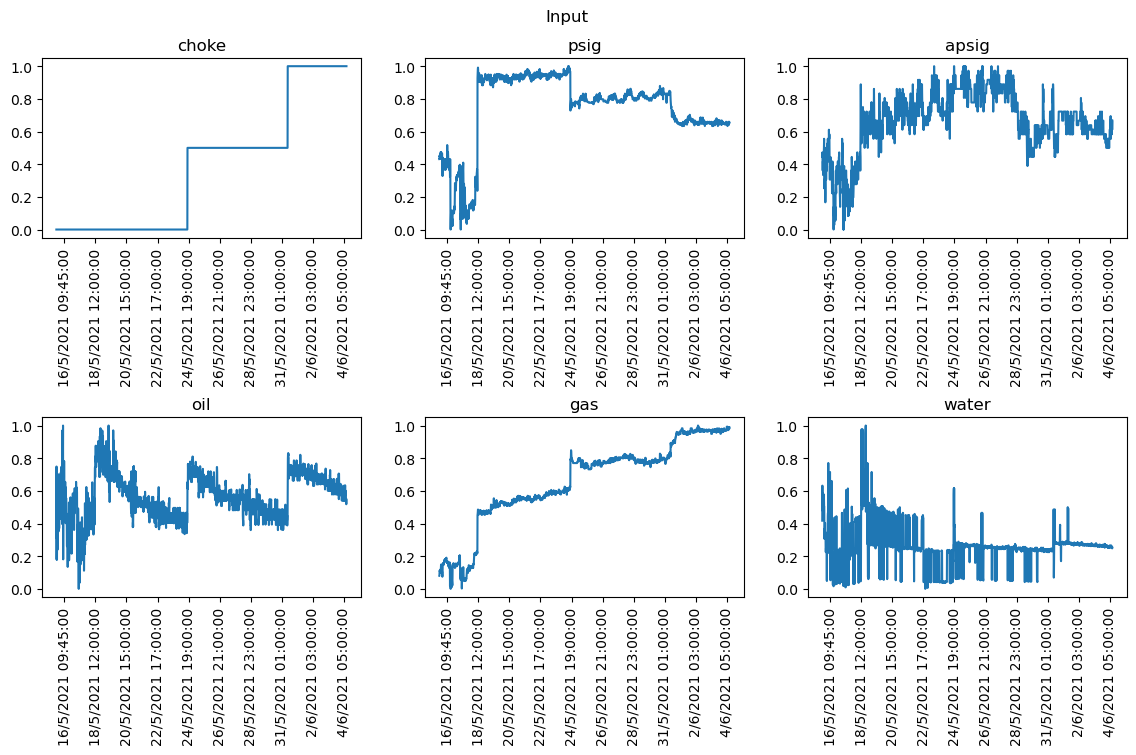

In [20]:
# normalized plot
# plotting
fig, ax = plt.subplots(figsize=(14, 7), ncols=3, nrows=2)

ax[0][0].plot(df_actual['datetime'], df_normalized['choke'])
ax[0][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][0].tick_params(axis='x', labelrotation=90)
ax[0][0].set_title('choke')

ax[0][1].plot(df_actual['datetime'], df_normalized['psig'])
ax[0][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][1].tick_params(axis='x', labelrotation=90)
ax[0][1].set_title('psig')

ax[0][2].plot(df_actual['datetime'], df_normalized['apsig'])
ax[0][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][2].tick_params(axis='x', labelrotation=90)
ax[0][2].set_title('apsig')

ax[1][0].plot(df_actual['datetime'], df_normalized['oil'])
ax[1][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][0].tick_params(axis='x', labelrotation=90)
ax[1][0].set_title('oil')

ax[1][1].plot(df_actual['datetime'], df_normalized['gas'])
ax[1][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][1].tick_params(axis='x', labelrotation=90)
ax[1][1].set_title('gas')

ax[1][2].plot(df_actual['datetime'], df_normalized['water'])
ax[1][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][2].tick_params(axis='x', labelrotation=90)
ax[1][2].set_title('water')

fig.subplots_adjust(hspace=1)
fig.suptitle('Input', y=0.95)

plt.show()

In [16]:
df_normalized.describe()

,choke,psig,apsig,oil,gas,water
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,0.373536,0.746895,0.666164,0.568969,0.655763,0.256388
std,0.384998,0.220544,0.183364,0.136035,0.256358,0.125876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.659483,0.583333,0.466429,0.532275,0.233945
50%,0.500000,0.803879,0.666667,0.572023,0.764686,0.256881
75%,0.500000,0.922414,0.777778,0.670911,0.805328,0.275229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#  split 90% 10%
def split(df_data, train_ratio=0.9):
  data_len = df_data.shape[0]
  train_len = math.floor((data_len * train_ratio))

  data_train = df_data.iloc[:train_len,]
  data_test = df_data.iloc[train_len:,]

  return data_train, data_test

In [18]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)


In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_normalized_data(df_actual, df_normalized):
    """
    Plot the normalized data from the given dataframes.

    :param df_actual: A dataframe containing the actual data.
    :param df_normalized: A dataframe containing the normalized data.
    """
    fig, ax = plt.subplots(figsize=(14, 7), ncols=3, nrows=2)

    ax[0][0].plot(df_actual['datetime'], df_normalized['choke'])
    ax[0][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
    ax[0][0].tick_params(axis='x', labelrotation=90)
    ax[0][0].set_title('choke')

    ax[0][1].plot(df_actual['datetime'], df_normalized['psig'])
    ax[0][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
    ax[0][1].tick_params(axis='x', labelrotation=90)
    ax[0][1].set_title('psig')

    ax[0][2].plot(df_actual['datetime'], df_normalized['apsig'])
    ax[0][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
    ax[0][2].tick_params(axis='x', labelrotation=90)
    ax[0][2].set_title('apsig')

    ax[1][0].plot(df_actual['datetime'], df_normalized['oil'])
    ax[1][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
    ax[1][0].tick_params(axis='x', labelrotation=90)
    ax[1][0].set_title('oil')

    ax[1][1].plot(df_actual['datetime'], df_normalized['gas'])
    ax[1][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
    ax[1][1].tick_params(axis='x', labelrotation=90)
    ax[1][1].set_title('gas')

    ax[1][2].plot(df_actual['datetime'], df_normalized['water'])
    ax[1][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
    ax[1][2].tick_params(axis='x', labelrotation=90)
    ax[1][2].set_title('water')

    fig.subplots_adjust(hspace=1)
    fig.suptitle('Input', y=0.95)

    plt.show()

In [29]:
def filter_dataframe_by(df, choke_value, column):
    """
    Filter the given dataframe by the specified choke value.

    :param df: The dataframe to filter.
    :param choke_value: The choke value to filter by.
    :return: A new dataframe containing only the rows where the choke value matches the specified value.
    """
    return df[df[column] == choke_value]

In [33]:
df_choke_48 = filter_dataframe_by(df_actual, 38, 'choke')
df_choke_48

,datetime,choke,psig,apsig,oil,gas,water
0,15/5/2021 21:00:00,38.0,935,320,698.880,4.980,23.616
1,15/5/2021 21:15:00,38.0,935,321,822.456,4.988,32.592
2,15/5/2021 21:30:00,38.0,940,318,661.368,5.070,26.208
3,15/5/2021 21:45:00,38.0,938,317,737.664,5.061,29.232
4,15/5/2021 22:00:00,38.0,940,319,661.368,5.078,26.208
...,...,...,...,...,...,...,...
849,24/5/2021 16:00:00,38.0,1062,334,707.232,6.546,15.360
850,24/5/2021 16:15:00,38.0,1064,330,733.080,6.518,7.872
851,24/5/2021 16:30:00,38.0,1059,332,742.008,6.539,7.968
852,24/5/2021 16:45:00,38.0,1060,336,724.896,6.579,15.744


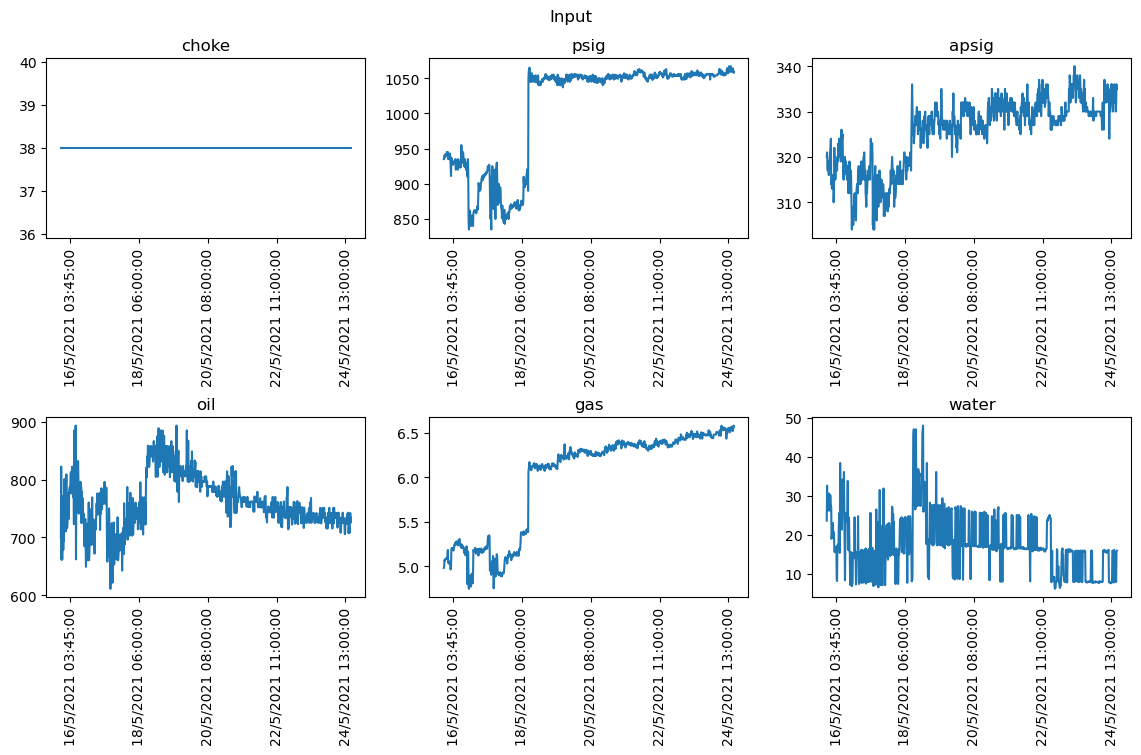

In [35]:
plot_normalized_data(df_choke_48, df_choke_48)

In [36]:
def sigmoid(x): 
    return 1. / (1 + np.exp(-x))
def sigmoid_derivative(values): 
    return values*(1-values)
def tanh_derivative(values): 
    return 1. - values ** 2
# createst uniform random array w/ values in [a,b) and shape args
def rand_arr(a, b, *args): 
    np.random.seed(0)
    return np.random.rand(*args) * (b - a) + a


In [58]:
from lstm import LstmNetwork, LstmNode, LstmState, LstmParam, rand_arr

In [65]:
lstm = LstmNode(LstmState(6, 7), LstmParam(7, 7))

In [68]:
import numpy as np

class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.W_xi = np.random.randn(hidden_size, input_size)
        self.W_hi = np.random.randn(hidden_size, hidden_size)
        self.W_xf = np.random.randn(hidden_size, input_size)
        self.W_hf = np.random.randn(hidden_size, hidden_size)
        self.W_xo = np.random.randn(hidden_size, input_size)
        self.W_ho = np.random.randn(hidden_size, hidden_size)
        self.W_xc = np.random.randn(hidden_size, input_size)
        self.W_hc = np.random.randn(hidden_size, hidden_size)
        self.b_i = np.zeros((hidden_size, 1))
        self.b_f = np.zeros((hidden_size, 1))
        self.b_o = np.zeros((hidden_size, 1))
        self.b_c = np.zeros((hidden_size, 1))

    def forward(self, x, h_prev, c_prev):
        input_gate = np.tanh(np.dot(self.W_xi, x) + np.dot(self.W_hi, h_prev) + self.b_i)
        forget_gate = np.tanh(np.dot(self.W_xf, x) + np.dot(self.W_hf, h_prev) + self.b_f)
        output_gate = np.tanh(np.dot(self.W_xo, x) + np.dot(self.W_ho, h_prev) + self.b_o)
        cell_state = np.tanh(np.dot(self.W_xc, x) + np.dot(self.W_hc, h_prev) + self.b_c)
        c = forget_gate * c_prev + input_gate * cell_state
        h = np.tanh(c) * output_gate
        return h, c

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from matplotlib import pyplot as plt

In [5]:
data = '''
datetime,choke,psig,apsig,oil,gas,water
...
'''

# Replace '...' with the rest of your data

df = pd.read_csv('final.csv', parse_dates=['datetime'], index_col='datetime')

# Fill missing values (if any)
df = df.fillna(method='ffill')

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop(['oil', 'gas', 'water'], axis=1))

# Separate target variables
oil = df['oil'].values.reshape(-1, 1)
gas = df['gas'].values.reshape(-1, 1)
water = df['water'].values.reshape(-1, 1)

/tmp/ipykernel_18100/1083922734.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('final.csv', parse_dates=['datetime'], index_col='datetime')
/tmp/ipykernel_18100/1083922734.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [6]:
# Define the number of timesteps and the number of features
n_timesteps = 10
n_features = scaled_data.shape[1]

# Create input sequences and corresponding output sequences
X, y_oil, y_gas, y_water = [], [], [], []
for i in range(n_timesteps, len(scaled_data)):
    X.append(scaled_data[i-n_timesteps:i, :])
    y_oil.append(oil[i])
    y_gas.append(gas[i])
    y_water.append(water[i])

# Convert to numpy arrays
X, y_oil, y_gas, y_water = np.array(X), np.array(y_oil), np.array(y_gas), np.array(y_water)

# Reshape input data for LSTM
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_timesteps, n_features)))
model.add(LSTM(units=50))
model.add(Dense(3))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, [y_oil, y_gas, y_water], epochs=100, batch_size=32)

2024-04-28 13:03:40.914347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-28 13:03:40.916866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-28 13:03:40.918371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2024-04-28 13:03:41.215621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-28 13:03:41.217268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-28 13:03:41.218601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

59/59 [==============================] - 7s 35ms/step - loss: 590967.7500
Epoch 2/100
59/59 [==============================] - 3s 43ms/step - loss: 582769.8750
Epoch 3/100
59/59 [==============================] - 2s 33ms/step - loss: 577492.7500
Epoch 4/100
59/59 [==============================] - 3s 42ms/step - loss: 572565.3125
Epoch 5/100
59/59 [==============================] - 2s 36ms/step - loss: 567789.7500
Epoch 6/100
59/59 [==============================] - 2s 33ms/step - loss: 563108.0625
Epoch 7/100
59/59 [==============================] - 2s 34ms/step - loss: 558495.7500
Epoch 8/100
59/59 [==============================] - 2s 42ms/step - loss: 553937.5625
Epoch 9/100
59/59 [==============================] - 3s 44ms/step - loss: 549426.8750
Epoch 10/100
59/59 [==============================] - 3s 45ms/step - loss: 544959.6250
Epoch 11/100
59/59 [==============================] - 2s 42ms/step - loss: 540529.3125
Epoch 12/100
59/59 [==============================] - 3s 50ms/st

KeyboardInterrupt: 